In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import airportsdata

In [11]:
airports = airportsdata.load()
# Replace non-ascii characters
for (k,v) in airports.items():
    old = airports[k]['name']
    airports[k]['name'] = ''.join([i if ord(i) < 128 else ' ' for i in old])

In [12]:
# Load dataset
flight_dec_19 = nx.read_gml("flightlist_20191201_20191231.gml")
flight_feb_20 = nx.read_gml("flightlist_20200201_20200229.gml")
flight_apr_20 = nx.read_gml("flightlist_20200401_20200430.gml")

Dataset: Flight dataset Dec.2019
The average degree is: 32.874213836477985


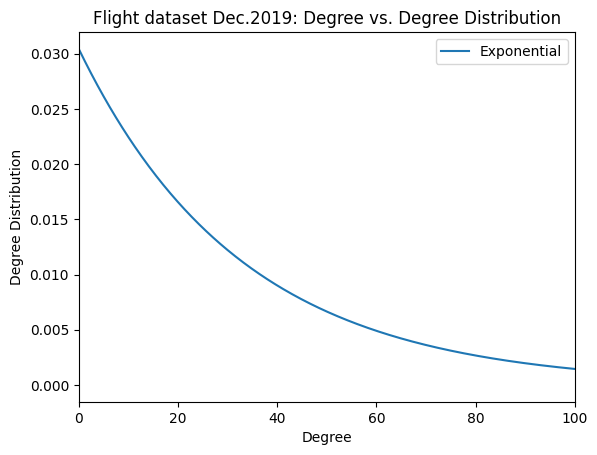

--------------------------------------------------------------------
Dataset: Flight dataset Feb.2020
The average degree is: 33.94833948339483


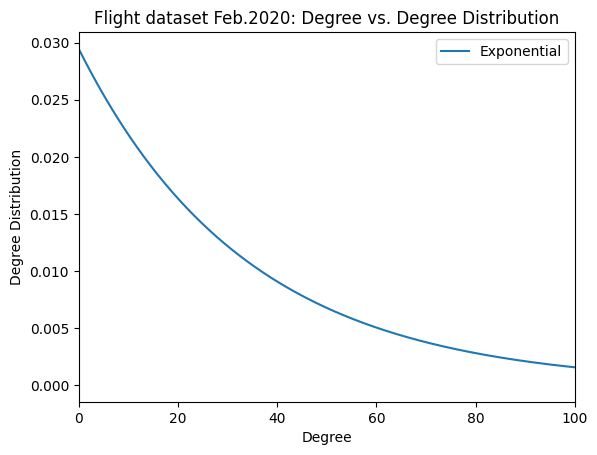

--------------------------------------------------------------------
Dataset: Flight dataset Apr.2020
The average degree is: 19.440976933514246


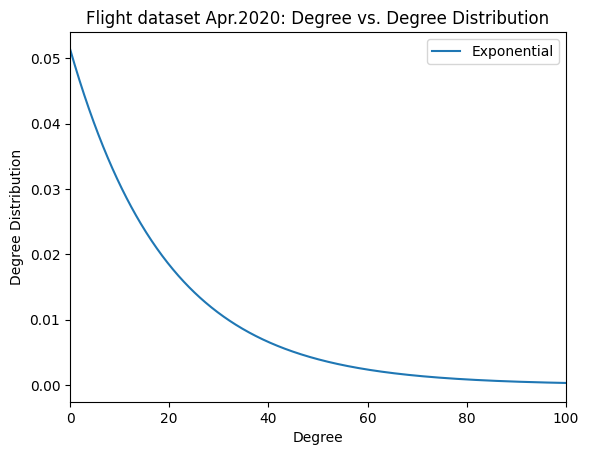

--------------------------------------------------------------------


In [13]:
# The WAN data reveals a scale-free behavior with an exponential cutoff
# the exponential distribution with mean value equal to ⟨𝑘⟩. 

def expo(k, lamda):
    return lamda**(-1) * np.exp(-k/lamda)

def myfunc(x,alpha):
    return x**(-alpha)

# Super mighty function ......
def dist_ave_pow(name, graph):
    print("Dataset: " + name)
    #Load degrees
    g_degrees = graph.degree()
    degrees = [ g_degrees[i] for i in graph.nodes() ]

    #Compute ave. degres
    sum_deg = []
    for i in degrees:
        sum_deg.append(i)
    ave_degree = sum(sum_deg) / len(sum_deg)
    print("The average degree is: " + str(ave_degree))

    # for expo
    k = np.sort(np.asarray([d for d in dict(graph.degree()).values()]), )
    spacing = np.linspace(min(k),max(k),len(k))

    #Create the plot
    # my_bins = np.logspace(np.log10(min(degrees)),np.log10(max(degrees) +1), 15 )
    # _ = plt.hist(degrees, bins = my_bins, density = True, label="Degree Dist.") 
    plt.plot(spacing,expo(spacing,ave_degree), label="Exponential")
    plt.title(name + ": Degree vs. Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Degree Distribution")
    
    plt.xlim([0, 100])
    plt.legend()
    plt.show()

    #Division between different datasets
    print("--------------------------------------------------------------------")


dist_ave_pow("Flight dataset Dec.2019", flight_dec_19)
dist_ave_pow("Flight dataset Feb.2020", flight_feb_20)
dist_ave_pow("Flight dataset Apr.2020", flight_apr_20)